# Neural Network Classification of the MNIST data set


In this tutorial we will classify the MNIST images 0-9 using neural networks built from the Keras library. Our Goal is to get image classification with accuracy > 90%

* Problem type: Image Classification
* Metric: Accuracy
* Classes: 10
* Technique: Fully Connected neural networks
* Data: Mnist data set (hand written images 0-9)

### Load and explore the data

Data set size:  70000  images
Train set size:  60000
Test set size:  10000
Distinct classes:  [0 1 2 3 4 5 6 7 8 9]
Number of classes:  10


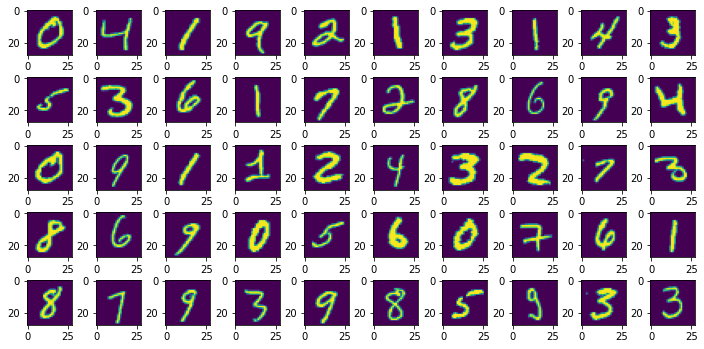

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
((trainX,trainY),(testX,testY)) = mnist.load_data()
#Data Set size
print("Data set size: ",trainX.shape[0]+testX.shape[0]," images")
print("Train set size: ",trainX.shape[0])
print("Test set size: ",testX.shape[0])
print("Distinct classes: ",np.unique(testY))
print("Number of classes: ",len(np.unique(testY)))
n=50
plt.figure(figsize=(12,12))
for i in range(1,n+1):
    plt.subplot(10,10,i)
    plt.imshow(trainX[i])
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show()

### As we can see, each image is a unique hand written 28 x 28 pixel image of a 0-9 digit. 

### Now we prepare our images for analysis using the following steps:

* Reshaping the array of images into a large sequence of individual matrices
* Converting the data type to float 32
* Dividing by 256 (because pixel intensity for each channel varies from 0-255)
    * This scales the image from 0-1 instead of 0-255 (easier to train) 
* Converting the labels into vectors using `LabelBinarizer()` method.
* Create an "unseen" validation set to ensure our model is well fit (used later).

In [2]:
#reshape the input dataset
trainX = trainX.reshape((trainX.shape[0],28*28*1))
testX = testX.reshape((testX.shape[0],28*28*1))

#scale data to the range of [0,1]
trainX = trainX.astype("float32")/256.0
testX = testX.astype("float32")/256.0

#convert the labels from integers to vectors
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

#split 10% of the test set as an evaluation set to ensure our hyper parameters are well fit
from sklearn.model_selection import train_test_split
(testX, evalX, testY, evalY) = train_test_split(testX,testY,test_size=0.10)

### Next we import relevant packages

* Classification report to descibe our results
* Sequential because the neural network passes one layer to the next
* Dense because a fully connected network (every node connects to every node)
* SGD because stochastic gradient descent is our weight training optimizer

In [6]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

### Now we build & train the model
The neural network we will build will be a 784-256-128-10 architecture using keras.

* 784 because each image is 28x28 pixels (28x28=784)
* 10 on the output because there are 10 classes
* 256 because there are naturally 256 possible color levels in the image
    * Other network architectures could work, but this works efficiently.
* Intermediate activation: Sigmoid function (similar to logistic regression).
* Final Activation function: softmax function (to produce normalized probabilities).
* Learning rate of 0.01
* Train for 100 epochs (number of times the entire data set is passed throught the network)
* Batch size of 128 (number of training instances before the weights are updated)
* Loss function of categorical cross entropy because its multiclassification

In [7]:
#define the 784-256-128-10 architecture using keras
model = Sequential() #instantiate the model
model.add(Dense(256,input_shape=(28*28,),activation="sigmoid")) #add first intermediate layer, define input
model.add(Dense(128,activation="sigmoid")) # add second layer
model.add(Dense(10,activation="softmax")) #softmax activation function normalizes the class probabilities for each prediction
print("[INFO] training network...")
sgd = SGD(0.01) #learning rate of 0.01
model.compile(loss="categorical_crossentropy",optimizer=sgd,metrics=["accuracy"])
H = model.fit(trainX,trainY,validation_data=(testX,testY),epochs=100,batch_size=128)

[INFO] training network...
Epoch 1/100


2022-04-10 20:34:26.748002: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


469/469 [==============================] - 2s 4ms/step - loss: 2.2772 - accuracy: 0.1815 - val_loss: 2.2382 - val_accuracy: 0.3536
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 2.2043 - accuracy: 0.4040 - val_loss: 2.1611 - val_accuracy: 0.4828
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 2.1144 - accuracy: 0.5288 - val_loss: 2.0508 - val_accuracy: 0.5801
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 1.9838 - accuracy: 0.5901 - val_loss: 1.8906 - val_accuracy: 0.6329
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 1.8002 - accuracy: 0.6333 - val_loss: 1.6795 - val_accuracy: 0.6856
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 1.5796 - accuracy: 0.6703 - val_loss: 1.4509 - val_accuracy: 0.7074
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 1.3626 - accuracy: 0.7076 - val_loss: 1.2471 - val_accuracy: 0.7329
Epoch 8/100

469/469 [==============================] - 2s 4ms/step - loss: 0.3171 - accuracy: 0.9085 - val_loss: 0.3091 - val_accuracy: 0.9102
Epoch 59/100
469/469 [==============================] - 2s 4ms/step - loss: 0.3154 - accuracy: 0.9093 - val_loss: 0.3079 - val_accuracy: 0.9112
Epoch 60/100
469/469 [==============================] - 2s 4ms/step - loss: 0.3138 - accuracy: 0.9093 - val_loss: 0.3064 - val_accuracy: 0.9109
Epoch 61/100
469/469 [==============================] - 2s 4ms/step - loss: 0.3122 - accuracy: 0.9096 - val_loss: 0.3049 - val_accuracy: 0.9111
Epoch 62/100
469/469 [==============================] - 2s 4ms/step - loss: 0.3108 - accuracy: 0.9104 - val_loss: 0.3030 - val_accuracy: 0.9109
Epoch 63/100
469/469 [==============================] - 2s 4ms/step - loss: 0.3092 - accuracy: 0.9108 - val_loss: 0.3022 - val_accuracy: 0.9117
Epoch 64/100
469/469 [==============================] - 2s 4ms/step - loss: 0.3078 - accuracy: 0.9112 - val_loss: 0.3007 - val_accuracy: 0.9132
Epoch

### Now we evaluate the model 

First give an over view of average accuracy across each class using the `classification_report` function.

In [8]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       890
           1       0.97      0.97      0.97      1026
           2       0.92      0.91      0.91       923
           3       0.90      0.90      0.90       890
           4       0.91      0.93      0.92       885
           5       0.90      0.87      0.88       815
           6       0.93      0.94      0.94       867
           7       0.93      0.92      0.93       928
           8       0.89      0.89      0.89       871
           9       0.91      0.90      0.90       905

    accuracy                           0.92      9000
   macro avg       0.92      0.92      0.92      9000
weighted avg       0.92      0.92      0.92      9000



### Now look the accuracy/loss progression of the model as it trains via matplotlib graphics
* Using the `.history` dictionary associated with the model object defined above (defined as `H`), we can make plots.

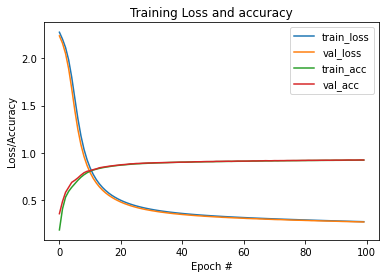

In [9]:
plt.figure()
plt.plot(np.arange(0,100),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,100),H.history["val_loss"],label="val_loss")
plt.plot(np.arange(0,100),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,100),H.history["val_accuracy"],label="val_acc")
plt.title("Training Loss and accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

### Now we look at unseen data, the evaluation set to see if our model is well fit

In [10]:
print("[INFO] evaluating network on unseen data...")
predictions_eval = model.predict(evalX, batch_size=128)
print(classification_report(evalY.argmax(axis=1),predictions_eval.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network on unseen data...
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        90
           1       0.99      0.98      0.99       109
           2       0.96      0.89      0.92       109
           3       0.91      0.94      0.93       120
           4       0.95      0.97      0.96        97
           5       0.86      0.90      0.88        77
           6       0.91      0.95      0.92        91
           7       0.95      0.94      0.94       100
           8       0.89      0.87      0.88       103
           9       0.94      0.92      0.93       104

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



### Hence on unseen data, we have 93% accuracy. In the train-test split, we had 92% accuracy.
Our model is well fit with >90% accuracy and thus we have accomplished our goal.